# Bert Entropy
Single-predictor models with entropy on BERT language model predictions

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
from tools.create import create_single_models, create_set_models
from tools.base import (dump_collection, load_collection, 
                        flatten_collection, compute_metrics,
                        _extract_regressors)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
from tools.viz import plot_contrast_by_analysis

In [3]:
api = Neuroscout()

## Create and compile

In [4]:
transformations = [{"Name": "Scale", 
                    "Demean": True, 
                    "Rescale": True,
                    "ReplaceNA": "after", 
                    "Input": ["BERTLM_pre_25_entropy"]}]

In [5]:
# Note that this will include cosine* and nonsteadstate* for all runs that fitlins finds them for, dynamically
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 
             'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

In [6]:
single_models = create_single_models(["BERTLM_pre_25_entropy"], confounds, transformations=transformations)

In [18]:
dump_collection(single_models, 'models/bert_entropy.json')

In [4]:
single_models = load_collection('models/bert_entropy.json')

### Reports

In [7]:
""" Run reports for all models """
for (pred, dataset, task), model in flatten_collection(single_models):
    model.generate_report(run_id=model.runs[0])

In [8]:
# Plot example design matrix
single_models['BERTLM_pre_25_entropy']['Budapest']['movie'].plot_report()

'OK'

### Compile

In [22]:
for (pred, dataset, task), model in flatten_collection(single_models):
    if model.get_status()['status'] == 'DRAFT':
        model.private = False
        model.compile()
    else:
        print(f'{model.status}')
        print(f'{dataset}')

PASSED
Budapest
PASSED
HealthyBrainNetwork
PASSED
LearningTemporalStructure
PASSED
Life
PASSED
ParanoiaStory
PASSED
Raiders
PASSED
Sherlock
PASSED
SherlockMerlin
PASSED
SherlockMerlin


In [20]:
print(' '.join([model.hash_id for (pred, dataset, task), model in flatten_collection(single_models)]))

wJ324 MNQGZ wy2Wd 9eyVk AZ4E2 M55kP Mv3Xb Mm3K3 MpDzb


## Results

In [5]:
flat_models = flatten_collection(single_models)

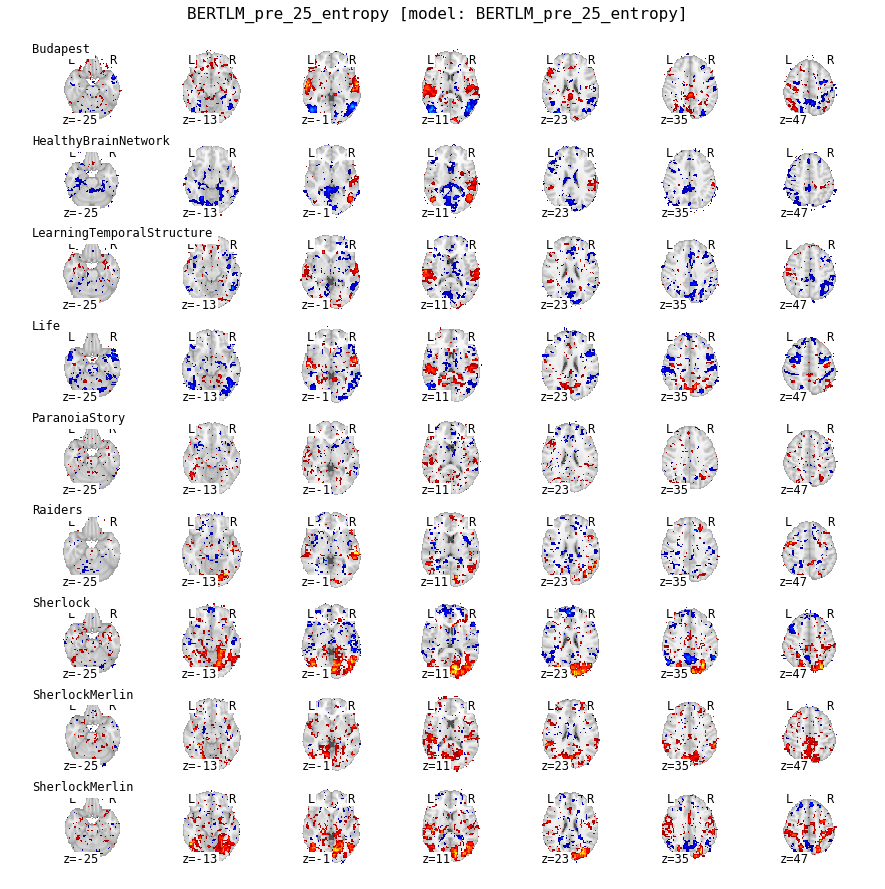

In [6]:
plt.rcParams.update({'font.family': 'monospace'})
plot_contrast_by_analysis(analyses=flat_models,
                         contrasts=['BERTLM_pre_25_entropy'],
                         vmax=10, display_mode='z', figsize=(15,15),
                         threshold=1.96, colorbar=False)